In [94]:
import pandas as pd
import json

dfs = []

for i in range(1, 41):
    url = f"../data/people/people_{i}0.json"
    with open(url, 'r') as f:
        data = json.load(f)
        dfs.append(pd.read_json(json.dumps(data)))

df = pd.concat(dfs)

In [95]:
df_copy = df

In [80]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
import sys
sys.path.insert(0, '../')
from preprocessing.utilities import preprocess_data, get_sign_pos, add_absolute_positions, add_aspects

In [96]:
df = preprocess_data(df)
df.shape

(20648, 95)

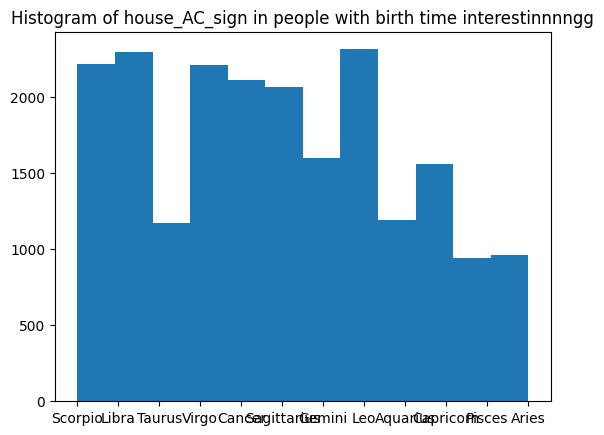

In [97]:
import matplotlib.pyplot as plt

def plot_histogram(df, series_id):
    plt.title(f'Histogram of {series_id} in people with birth time interestinnnngg')

    s_str = df[series_id].astype(str)
    plt.hist(s_str, bins=12)
    plt.show()

plot_histogram(df, "house_AC_sign")

In [98]:
df["occupation"].unique()

array(['politician', 'writer', 'writer, poet', ...,
       'Norwegian mass murderer',
       'actress, singer, director, dancer, screenwriter, lyricist',
       'comedian, actress'], dtype=object)

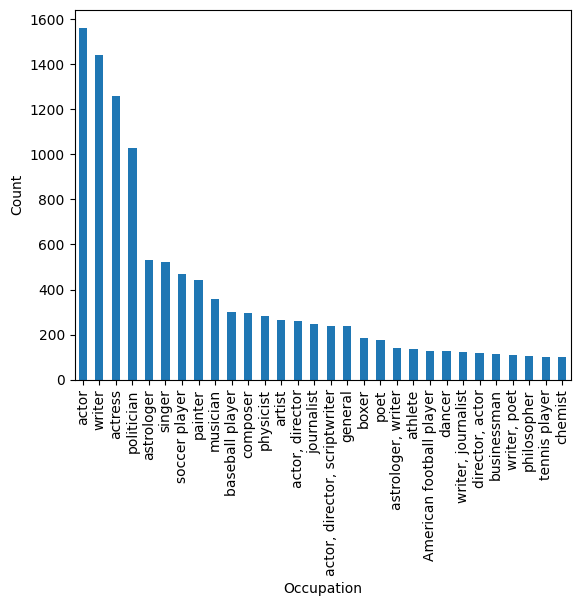

In [99]:
counts = df['occupation'].value_counts()

counts = counts[counts >= 100]
counts.plot(kind='bar')

plt.xlabel('Occupation')
plt.ylabel('Count')

# Show the plot
plt.show()

In [100]:
df['birth_year'] = df['birth_year'].astype(int)

In [101]:
mask = df['birth_year'] >= 1900
df_1900 = df[mask]
df_1900.shape

(16376, 95)

In [104]:
df.shape

(20648, 95)

In [105]:
cols_to_replace = ['uranus_retrograde', 'jupiter_retrograde', 'pluto_retrograde', 'mercury_retrograde', 'saturn_retrograde', 'venus_retrograde', 'mars_retrograde']
df[cols_to_replace] = df[cols_to_replace].fillna(False)


In [118]:
df = add_absolute_positions(df)

In [163]:
df.head()

,name,birth_day,birth_month,birth_year,birth_time,mercury_sign,mercury_pos_degrees,mercury_pos_minutes,mercury_house,mercury_retrograde,...,saturn_uranus_angle,saturn_neptune_angle,saturn_moon_angle,saturn_sun_angle,uranus_neptune_angle,uranus_moon_angle,uranus_sun_angle,neptune_moon_angle,neptune_sun_angle,moon_sun_angle
0,Gouverneur Morris,30,1.0,1752,01:44,Aquarius,2.0,51.0,3,1.0,...,66.55,141.30,139.40,48.14,207.85,205.95,18.41,1.90,189.44,187.54
1,Adolfh Freiherr Knigge,16,10.0,1752,05:30,Libra,6.0,11.0,12,False,...,69.10,136.40,41.67,57.36,205.50,27.43,126.46,178.07,79.04,99.03
3,Thomas Chatterton,20,11.0,1752,06:14,Sagittarius,2.0,21.0,1,False,...,65.55,139.73,222.76,25.58,205.28,288.31,91.13,83.03,114.15,197.18
4,Solomon Drowne,11,3.0,1753,08:00,Pisces,12.0,55.0,11,False,...,59.14,153.46,208.51,75.90,212.60,267.65,16.76,55.05,229.36,284.41
6,Franz Carl Achard,28,4.0,1753,14:00,Taurus,19.0,31.0,9,1.0,...,60.57,154.45,65.50,237.71,215.02,4.93,298.28,219.95,83.26,303.21


In [173]:
df_aspects = add_aspects(df)

mercury


/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect["name"]}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect["name"]}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/not

venus


/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect["name"]}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect["name"]}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/not

mars
jupiter


/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect["name"]}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect["name"]}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/not

/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect["name"]}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect["name"]}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/not

saturn
uranus


/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect["name"]}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect["name"]}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/not

neptune
moon
sun


/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect["name"]}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/notebooks/../preprocessing/utilities.py:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{planet}_{other_planet}_{aspect["name"]}"] = df[f"{planet}_{other_planet}_angle"].apply(lambda x: abs(x - aspect['deg']) <= 5)
/mnt/d/DEV/outisfun/astro_ml/not

In [178]:
count = (df["moon_sun_opposition"] == True).sum()

print(count)

594


IndexError: index 179 is out of bounds for axis 0 with size 6

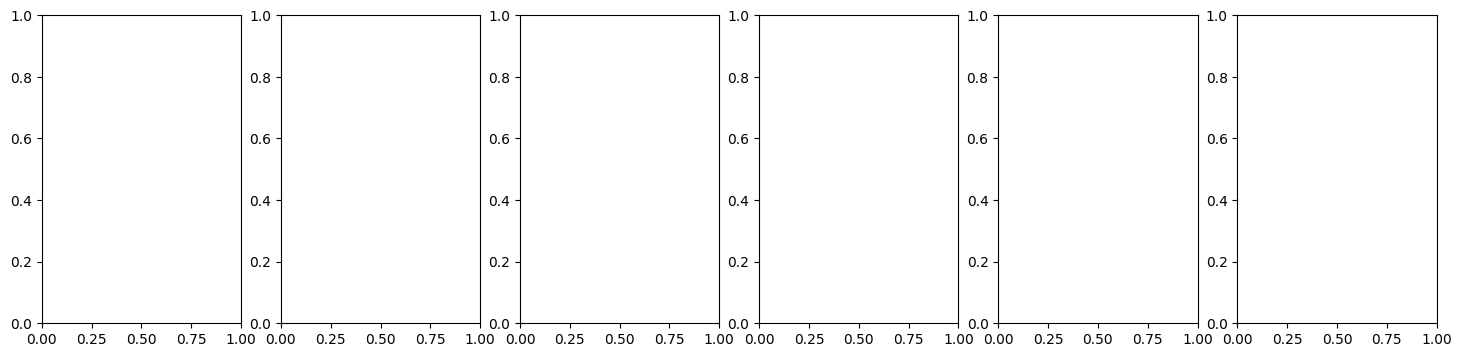

In [184]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18, 4))

ASPECTS = [
    {'name': 'conjunction', 'deg': 0},
    {'name': 'sextile', 'deg': 60},
    {'name': 'square', 'deg': 90},
    {'name': 'trine', 'deg': 120},
    {'name': 'opposition', 'deg': 180}
]
count = 0
# plot each histogram on a separate subplot
for i in range(0, 180):
    for aspect in ASPECTS:
        col = df.columns[i]
        # check if the aspect name is a substring of any column name in the dataframe
        if aspect['name'] in col:
            count += 1
            df2[col].hist(ax=axes[i], bins=2)
            axes[i].set_title(col)

# adjust the plot spacing and show the plot
# plt.subplots_adjust(wspace=0.4)
# plt.show()
print(count)